# **Display 3D GroundTruth** 
***

## Dataset
[KITTI 2011_09_26_drive_0005 dataset](http://www.cvlibs.net/datasets/kitti/raw_data.php?type=city)  
In this code, rectified image is used.

refer to [KITTI Dataset Paper](http://www.cvlibs.net/publications/Geiger2013IJRR.pdf) for the details of data measurement environment

## Objective

Display tracklet

In [2]:
import numpy as np
import glob
from src import parseTrackletXML as pt_XML
from kitti_foundation import Kitti, Kitti_util
%matplotlib inline

In [3]:
rootdata = "/home/shivkumar/PP/data/kitti/2011_09_26/2011_09_26_drive_0011_sync/"

In [4]:
image_type = 'color'  # 'gray' or 'color' image
mode = '00' if image_type == 'gray' else '02'  # image_00 = 'graye image' , image_02 = 'color image'

image_path = rootdata+'image_' + mode + '/data'
velo_path = rootdata+'velodyne_points/data'
xml_path = rootdata+"tracklet_labels.xml"
v2c_filepath = rootdata+'calib_velo_to_cam.txt'
c2c_filepath = rootdata+'calib_cam_to_cam.txt'
frame = 0

check = Kitti_util(frame=frame, velo_path=velo_path, camera_path=image_path, \
                   xml_path=xml_path, v2c_path=v2c_filepath, c2c_path=c2c_filepath)

# bring velo points & tracklet info
# points = check.velo_file
tracklet_, type_ , info_ = check.tracklet_info

# print(points.shape)
print('The number of GT : ', len(tracklet_[frame]))


parsing tracklet file /home/shivkumar/PP/data/kitti/2011_09_26/2011_09_26_drive_0011_sync/tracklet_labels.xml
file contains 20 tracklets
loaded 20 tracklets
The number of GT :  4


In [4]:
info_ # [truncation, occlusion, translation, rotation, tracklet.size, yaw, yawVisual]
# for key in info_.keys():
#     if info_[key] is not None:
#         for x in info_[key]:
#             print(x[1])
# [type, truncated, occluded, alpha, bbox, dimensions, location, rotation_y, score]

{33: [[0.0,
   0.0,
   array([ 8.19477860e+01,  7.19745189e-02, -8.72143022e-01]),
   array([ 0.        ,  0.        , -3.37755737]),
   array([1.4497192, 1.5875663, 4.279449 ]),
   -3.3775573732948696,
   2.904749636814586],
  [0.0,
   0.0,
   array([ 70.47725013, -11.38241436,  -0.94040527]),
   array([ 0.        ,  0.        , -0.20854089]),
   array([1.4321095, 1.5949483, 4.21347  ]),
   -0.20854089031468367,
   3.093173921154818]],
 34: [[0.0,
   0.0,
   array([80.26740642,  0.33022945, -0.85888991]),
   array([ 0.       ,  0.       , -3.3746788]),
   array([1.4497192, 1.5875663, 4.279449 ]),
   -3.374678802533017,
   2.90439241145319],
  [0.0,
   0.0,
   array([ 69.32444095, -11.23312306,  -0.89395797]),
   array([ 0.        ,  0.        , -0.20610629]),
   array([1.4321095, 1.5949483, 4.21347  ]),
   -0.2061062867151288,
   3.0961271305608706]],
 35: [[0.0,
   0.0,
   array([78.58702683,  0.58848439, -0.8456368 ]),
   array([ 0.        ,  0.        , -3.37180023]),
   array([1.4

AttributeError: 'generator' object has no attribute 'T'

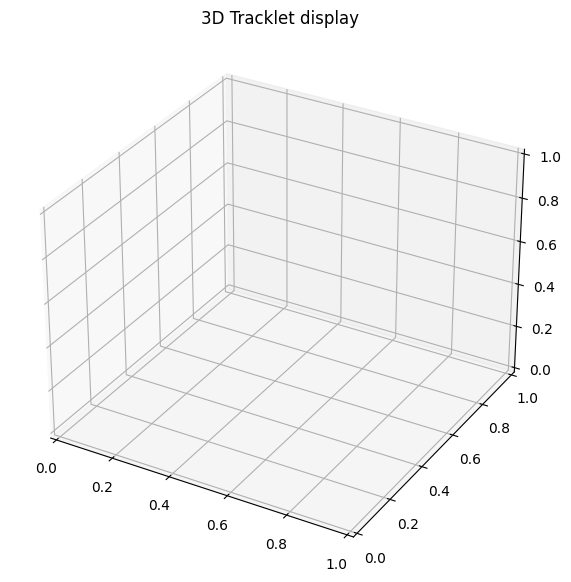

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def draw_3d_box(tracklet_, type_):
    """ draw 3d bounding box """
    
    type_c = { 'Car': 'b', 'Van': 'g', 'Truck': 'r', 'Pedestrian': 'c', \
          'Person (sitting)': 'm', 'Cyclist': 'y', 'Tram': 'k', 'Misc': 'w'}
    
    line_order = ([0, 1], [1, 2],[2, 3],[3, 0], [4, 5], [5, 6], \
             [6 ,7], [7, 4], [4, 0], [5, 1], [6 ,2], [7, 3])

    for i, j in zip(tracklet_[frame], type_[frame]):
        for k in line_order:    
            ax.plot3D(*zip(i.T[k[1]],i.T[k[0]]), lw = 1.5, color=type_c[j])

fig = plt.figure(figsize=(13, 7))
ax = fig.add_subplot(111, projection='3d')
plt.title("3D Tracklet display")
pnt = points.T[:, 1::5] # one point in 5 points

ax.scatter(*pnt, s = 0.1, c='k', marker='.', alpha=0.5)

draw_3d_box(tracklet_, type_)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_xlim3d(-10,30)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(-2,15)

plt.show()

(-18, 180) (117, 233) Car
(99, 169) (223, 223) Car
(207, 178) (289, 215) Car
(311, 166) (366, 207) Misc


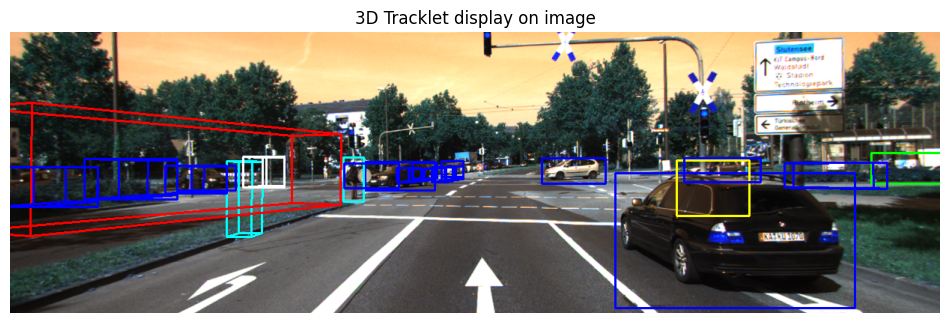

In [21]:
import cv2
import matplotlib.pyplot as plt
frame = 0
image = check.camera_file
tracklet_, type_, info_= check.tracklet_info

tracklet2d = []
for i, j in zip(tracklet_[frame], type_[frame]):
    point = i.T
    chk,_ = check._Kitti_util__velo_2_img_projection(point)
    tracklet2d.append(chk)

type_c = { 'Car': (0, 0, 255), 'Van': (0, 255, 0), 'Truck': (255, 0, 0), 'Pedestrian': (0,255,255), \
      'Person (sitting)': (255, 0, 255), 'Cyclist': (255, 255, 0), 'Tram': (0, 0, 0), 'Misc': (255, 255, 255)}

line_order = ([0, 1], [1, 2],[2, 3],[3, 0], [4, 5], [5, 6], \
         [6 ,7], [7, 4], [4, 0], [5, 1], [6 ,2], [7, 3])

for i, j in zip(tracklet2d, type_[frame]):
    x1, y1 = int(min(i[0])), int(min(i[1]))
    x2, y2 = int(max(i[0])), int(max(i[1]))
    print((x1, y1),( x2, y2), j)
    cv2.rectangle(image, (x1, y1),( x2, y2), type_c[j], 2)
    # for k in line_order:    
    #     cv2.line(image, (int(i[0][k[0]]), int(i[1][k[0]])), (int(i[0][k[1]]), int(i[1][k[1]])), type_c[j], 2)

plt.subplots(1,1, figsize = (12,4))
plt.title("3D Tracklet display on image")
plt.axis('off')
plt.imshow(image)

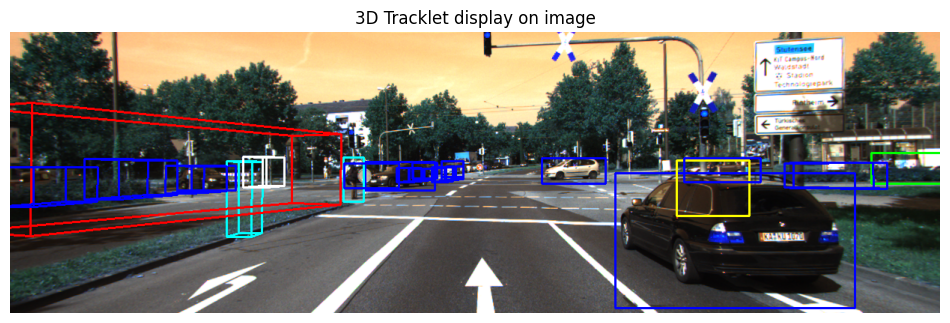

In [20]:
import cv2

frame = 0
image = check.camera_file
tracklet_, type_, info_ = check.tracklet_info

tracklet2d = []
for i, j in zip(tracklet_[frame], type_[frame]):
    point = i.T
    chk,_ = check._Kitti_util__velo_2_img_projection(point)
    tracklet2d.append(chk)

type_c = { 'Car': (0, 0, 255), 'Van': (0, 255, 0), 'Truck': (255, 0, 0), 'Pedestrian': (0,255,255), \
      'Person (sitting)': (255, 0, 255), 'Cyclist': (255, 255, 0), 'Tram': (0, 0, 0), 'Misc': (255, 255, 255)}

line_order = ([0, 1], [1, 2],[2, 3],[3, 0], [4, 5], [5, 6], \
         [6 ,7], [7, 4], [4, 0], [5, 1], [6 ,2], [7, 3])

for i, j in zip(tracklet2d, type_[frame]):
    for k in line_order:    
        cv2.line(image, (int(i[0][k[0]]), int(i[1][k[0]])), (int(i[0][k[1]]), int(i[1][k[1]])), type_c[j], 2)

plt.subplots(1,1, figsize = (12,4))
plt.title("3D Tracklet display on image")
plt.axis('off')
plt.imshow(image)

In [15]:
tracklet_

{33: [array([[83.84264569, 84.21378865, 80.05292635, 79.68178338, 83.84264569,
          84.21378865, 80.05292635, 79.68178338],
         [-1.20003942,  0.34353424,  1.34398846, -0.19958521, -1.20003942,
           0.34353424,  1.34398846, -0.19958521],
         [-0.87214302, -0.87214302, -0.87214302, -0.87214302,  0.57757618,
           0.57757618,  0.57757618,  0.57757618]]),
  array([[ 68.58126273,  68.2510564 ,  72.37323752,  72.70344386,
           68.58126273,  68.2510564 ,  72.37323752,  72.70344386],
         [-10.16605538, -11.72644759, -12.59877334, -11.03838113,
          -10.16605538, -11.72644759, -12.59877334, -11.03838113],
         [ -0.94040527,  -0.94040527,  -0.94040527,  -0.94040527,
            0.49170423,   0.49170423,   0.49170423,   0.49170423]])],
 34: [array([[ 8.21659198e+01,  8.25326180e+01,  7.83688930e+01,
           7.80021949e+01,  8.21659198e+01,  8.25326180e+01,
           7.83688930e+01,  7.80021949e+01],
         [-9.36324734e-01,  6.08310894e-01,  1

In [7]:
len(tracklet_)

233

In [9]:
import cv2
import math
for frame in range(0, len(tracklet_)):
    check = Kitti_util(frame=frame, velo_path=velo_path, camera_path=image_path, \
                   xml_path=xml_path, v2c_path=v2c_filepath, c2c_path=c2c_filepath)

    image = check.camera_file
    tracklet_, type_, info_ = check.tracklet_info
    frame_name = str(frame)
    file_name = "0000000000"
    file_name = file_name[:-len(frame_name)]
    file_name = file_name + frame_name + ".txt"
    # print(file_name)
    # continue
    file_name = "data/2011_09_26_drive_0011_sync/" + file_name

    if tracklet_[frame] is None:
        continue

    tracklet2d = []
    for i, j in zip(tracklet_[frame], type_[frame]):
        point = i.T
        chk,_ = check._Kitti_util__velo_2_img_projection(point)
        tracklet2d.append(chk)

    type_c = { 'Car': (0, 0, 255), 'Van': (0, 255, 0), 'Truck': (255, 0, 0), 'Pedestrian': (0,255,255), \
        'Person (sitting)': (255, 0, 255), 'Cyclist': (255, 255, 0), 'Tram': (0, 0, 0), 'Misc': (255, 255, 255)}

    line_order = ([0, 1], [1, 2],[2, 3],[3, 0], [4, 5], [5, 6], \
            [6 ,7], [7, 4], [4, 0], [5, 1], [6 ,2], [7, 3])
    
    with open(file_name, 'w') as f:
        for i, j, k in zip(tracklet2d, type_[frame], info_[frame]):
            x1, y1 = math.floor(min(i[0])) - 5, math.floor(min(i[1])) - 5
            x2, y2 = math.ceil(max(i[0])), math.ceil(max(i[1]))
            x1 = x1 if x1 > 0 else 0
            y1 = y1 if y1 > 0 else 0
            # cv2.rectangle(image, (x1, y1),( x2, y2), type_c[j], 2)
            # for k in line_order:    
            #     cv2.line(image, (int(i[0][k[0]]), int(i[1][k[0]])), (int(i[0][k[1]]), int(i[1][k[1]])), type_c[j], 2)
            t = j
            trunc = k[0]
            occ = k[1] if k[1] != 255 else 3
            alpha = k[6]
            bbox = x1, y1, x2, y2
            l, h, w = k[4]
            x, y, z = k[2]
            ry = k[5]
            score = 1
            # print(t, trunc, occ, alpha, h, w, l, x, y, z, ry, score)
            # break
            res = str(t)+" "+str(trunc)+" "+str(occ)+" "+str(alpha)+" "+str(x1)+" "+str(y1)+" "+str(x2)+" "+str(y2)+" "+str(h)+" "+str(w)+" "+str(l)+" "+str(x)+" "+str(y)+" "+str(z)+" "+str(ry)+" "+str(score)+"\n"
            f.write(res)
    # plt.subplots(1,1, figsize = (12,4))
    # plt.title("3D Tracklet display on image")
    # plt.axis('off')
    # plt.imshow(image)
    # plt.show()

parsing tracklet file /home/shivkumar/PP/data/kitti/2011_09_26/2011_09_26_drive_0011_sync/tracklet_labels.xml
file contains 20 tracklets
loaded 20 tracklets
parsing tracklet file /home/shivkumar/PP/data/kitti/2011_09_26/2011_09_26_drive_0011_sync/tracklet_labels.xml
file contains 20 tracklets
loaded 20 tracklets
parsing tracklet file /home/shivkumar/PP/data/kitti/2011_09_26/2011_09_26_drive_0011_sync/tracklet_labels.xml
file contains 20 tracklets
loaded 20 tracklets
parsing tracklet file /home/shivkumar/PP/data/kitti/2011_09_26/2011_09_26_drive_0011_sync/tracklet_labels.xml
file contains 20 tracklets
loaded 20 tracklets
parsing tracklet file /home/shivkumar/PP/data/kitti/2011_09_26/2011_09_26_drive_0011_sync/tracklet_labels.xml
file contains 20 tracklets
loaded 20 tracklets
parsing tracklet file /home/shivkumar/PP/data/kitti/2011_09_26/2011_09_26_drive_0011_sync/tracklet_labels.xml
file contains 20 tracklets
loaded 20 tracklets
parsing tracklet file /home/shivkumar/PP/data/kitti/2011_0

In [ ]:
info_ # [truncation, occlusion, translation, rotation, tracklet.size, yaw, yawVisual]
# for key in info_.keys():
#     if info_[key] is not None:
#         for x in info_[key]:
#             print(x[1])
# [type, truncated, occluded, alpha, bbox, dimensions, location, rotation_y, score]

In [6]:
tracklet_[0], type_[0], info_[0]

([array([[23.28990321, 23.33061819, 20.06044336, 20.01972838, 23.28990321,
          23.33061819, 20.06044336, 20.01972838],
         [15.96036518, 17.36104765, 17.45610495, 16.05542248, 15.96036518,
          17.36104765, 17.45610495, 16.05542248],
         [-1.43309045, -1.43309045, -1.43309045, -1.43309045,  0.03080375,
           0.03080375,  0.03080375,  0.03080375]]),
  array([[28.29991438, 28.39240708, 24.10966321, 24.01717051, 28.29991438,
          28.39240708, 24.10966321, 24.01717051],
         [15.26142002, 16.85825426, 17.10632168, 15.50948744, 15.26142002,
          16.85825426, 17.10632168, 15.50948744],
         [-1.37140298, -1.37140298, -1.37140298, -1.37140298,  0.40558752,
           0.40558752,  0.40558752,  0.40558752]]),
  array([[32.97063371, 33.09040183, 29.48473745, 29.36496933, 32.97063371,
          33.09040183, 29.48473745, 29.36496933],
         [14.77972132, 16.24540053, 16.54003775, 15.07435854, 14.77972132,
          16.24540053, 16.54003775, 15.0743585

In [36]:
tracklet_[0][0].shape

(3, 8)

In [23]:
with open("/home/shivkumar/PP/KITTI_Tutorial/devkit_object/mapping/train_rand.txt") as f:
    randm_idx = f.readlines()

with open("/home/shivkumar/PP/KITTI_Tutorial/devkit_object/mapping/train_mapping.txt") as f:
    train_map = f.readlines()
    train_map = [x.strip() for x in train_map]

In [19]:
len(randm_idx[0].split(","))

7481

In [24]:
randm_idx = [int(x) for x in randm_idx[0].split(",")]

In [16]:
train_map

['2011_09_26 2011_09_26_drive_0005_sync 0000000109',
 '2011_09_26 2011_09_26_drive_0005_sync 0000000125',
 '2011_09_26 2011_09_26_drive_0005_sync 0000000127',
 '2011_09_26 2011_09_26_drive_0005_sync 0000000130',
 '2011_09_26 2011_09_26_drive_0005_sync 0000000133',
 '2011_09_26 2011_09_26_drive_0005_sync 0000000136',
 '2011_09_26 2011_09_26_drive_0005_sync 0000000139',
 '2011_09_26 2011_09_26_drive_0005_sync 0000000142',
 '2011_09_26 2011_09_26_drive_0005_sync 0000000145',
 '2011_09_26 2011_09_26_drive_0005_sync 0000000151',
 '2011_09_26 2011_09_26_drive_0009_sync 0000000001',
 '2011_09_26 2011_09_26_drive_0009_sync 0000000002',
 '2011_09_26 2011_09_26_drive_0009_sync 0000000003',
 '2011_09_26 2011_09_26_drive_0009_sync 0000000004',
 '2011_09_26 2011_09_26_drive_0009_sync 0000000005',
 '2011_09_26 2011_09_26_drive_0009_sync 0000000006',
 '2011_09_26 2011_09_26_drive_0009_sync 0000000007',
 '2011_09_26 2011_09_26_drive_0009_sync 0000000008',
 '2011_09_26 2011_09_26_drive_0009_sync 000000

In [5]:
train_map[randm_idx[0]]

'2011_09_28 2011_09_28_drive_0106_sync 0000000054'

In [ ]:
for i in randm_idx:
    print(train_map[randm_idx[i]])

In [27]:
import os
labels = sorted(os.listdir("/home/shivkumar/PP/KITTI_Tutorial/data_object_calib/testing/calib"))
labels

['000000.txt',
 '000001.txt',
 '000002.txt',
 '000003.txt',
 '000004.txt',
 '000005.txt',
 '000006.txt',
 '000007.txt',
 '000008.txt',
 '000009.txt',
 '000010.txt',
 '000011.txt',
 '000012.txt',
 '000013.txt',
 '000014.txt',
 '000015.txt',
 '000016.txt',
 '000017.txt',
 '000018.txt',
 '000019.txt',
 '000020.txt',
 '000021.txt',
 '000022.txt',
 '000023.txt',
 '000024.txt',
 '000025.txt',
 '000026.txt',
 '000027.txt',
 '000028.txt',
 '000029.txt',
 '000030.txt',
 '000031.txt',
 '000032.txt',
 '000033.txt',
 '000034.txt',
 '000035.txt',
 '000036.txt',
 '000037.txt',
 '000038.txt',
 '000039.txt',
 '000040.txt',
 '000041.txt',
 '000042.txt',
 '000043.txt',
 '000044.txt',
 '000045.txt',
 '000046.txt',
 '000047.txt',
 '000048.txt',
 '000049.txt',
 '000050.txt',
 '000051.txt',
 '000052.txt',
 '000053.txt',
 '000054.txt',
 '000055.txt',
 '000056.txt',
 '000057.txt',
 '000058.txt',
 '000059.txt',
 '000060.txt',
 '000061.txt',
 '000062.txt',
 '000063.txt',
 '000064.txt',
 '000065.txt',
 '000066.t

In [29]:
import os
import shutil
data_dir = "/home/shivkumar/PP/KITTI_Tutorial/test_data"
# labels = os.listdir("/home/shivkumar/PP/KITTI_Tutorial/training/label_2")
for i in range(len(randm_idx)):
    x = train_map[randm_idx[i]-1].split(" ")
    # print(x)
    dir1, dir2, rname = x[0], x[1], x[2]
    if dir1 not in os.listdir(data_dir):
        os.mkdir(data_dir + "/" + dir1)
    if dir2 not in os.listdir(data_dir + "/" + dir1):
        os.mkdir(data_dir + "/" + dir1 + "/" + dir2)
    ntext = data_dir + "/" + dir1 + "/" + dir2 + "/" + rname+".txt"
    ptext = "/home/shivkumar/PP/KITTI_Tutorial/data_object_calib/testing/calib/"+labels[i]
    shutil.copy(ptext, ntext)